<a href="https://colab.research.google.com/github/jayaemekar/CSCI-611-AppiledMachineLearning/blob/main/PathToHerdImmunity_ProphetModel_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team Members: 
1. Jayarani Emekar
2. Monika Gadage
3. Viraj Sonawane

Date - 15 May 2021
Enviorment Developed : Google colab

Major References- sklearn lectures, prophet model tutorials, muller book, owid repo

# Path To Herd Immunity -Covid 19 Prediction using Prophet
1. Data Source from OUR WORLD in Data GitHub repository.
2. Goal to predict COVID-19 Path to Herd Immunity via
Time Series Analysis
3. Dataset available here: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv


# NOTEBOOK INCLUDES
 1. Data Preparation including cleaning and Missing data
 2. Exploratory data analysis on complete world vaccination data 
 3. Exploration of Prophet 



# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy
from matplotlib import dates
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import Javascript
from datetime import datetime
from pandas.api.types import is_numeric_dtype
from google.colab import files
import os
import time
import getpass
import statistics
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from pylab import rcParams
rcParams["figure.figsize"] = 12,8


## Import geopandas for ploting of world map

In [ ]:
#import for geomaps
!pip install geopandas

In [ ]:
#import geo data from geopandas
import geopandas as gpd

# Load the data 
1. Take the latest data(updated on daily basis) in our world in Data github repository

In [ ]:
#set variables for loading the 

#load URL
covid_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
#read the CSV file
covid_data = pd.read_csv(covid_url, error_bad_lines=False)


## Shape of data

In [ ]:
#Shape of data
covid_data.shape

(89466, 59)

##Number of countries in the dataset

Check how many countries are present in the dataset

In [ ]:
#Check how many countries are present in the dataset
covid_data['location'].nunique()

230

In [ ]:
#check for all missing values in data
covid_data.isnull().sum()

iso_code                                     0
continent                                 4774
location                                     0
date                                         0
total_cases                               3409
new_cases                                 3411
new_cases_smoothed                        4412
total_deaths                             13186
new_deaths                               13028
new_deaths_smoothed                       4412
total_cases_per_million                   3873
new_cases_per_million                     3875
new_cases_smoothed_per_million            4871
total_deaths_per_million                 13637
new_deaths_per_million                   13479
new_deaths_smoothed_per_million           4871
reproduction_rate                        18158
icu_patients                             80455
icu_patients_per_million                 80455
hosp_patients                            78243
hosp_patients_per_million                78243
weekly_icu_ad

**We see null values in vaccination columns as 70k because vaccination started from around December in various countries and we will only have data from that day**

## Print basic statics of data

In [ ]:
# Print basic statics of data
cm = sns.light_palette("red", as_cmap=True)
covid19_stats = covid_data.describe().style.background_gradient(cmap=cm)
display(covid19_stats)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,86057.000000,86055.000000,85054.000000,76280.000000,76438.000000,85054.000000,85593.000000,85591.000000,84595.000000,75829.000000,75987.000000,84595.000000,71308.000000,9011.000000,9011.000000,11223.000000,11223.000000,816.000000,816.000000,1415.000000,1415.000000,40281.000000,39969.000000,39969.000000,40281.000000,46583.000000,46583.000000,43378.000000,42784.000000,11573.000000,10835.000000,8251.000000,9852.000000,18776.000000,11573.000000,10835.000000,8251.000000,18776.000000,75103.000000,88881.000000,82796.000000,80049.000000,79143.000000,79604.000000,80238.000000,54353.000000,80478.000000,82242.000000,63025.000000,62098.000000,40433.000000,73405.000000,84452.000000,80661.000000
mean,884200.846323,6007.646923,6002.256028,24211.614185,141.545789,125.806096,10822.107291,75.611700,75.692443,238.826686,1.520805,1.354163,1.014384,1094.592054,26.978177,4841.156910,176.134941,282.431369,21.435567,3766.355194,114.921372,44381.947494,6356898.984638,246.871153,1.944702,42339.560999,1.857829,0.090456,158.686329,22435834.665601,13294723.291278,7076030.471700,586367.009846,302942.745952,15.201542,10.491313,5.807703,2838.465062,58.673545,138196042.645369,377.961888,30.583150,8.803259,5.574773,19294.453068,13.362066,257.947084,7.867884,10.530404,32.663633,50.894688,3.029547,73.223909,0.727890
std,6100232.652455,37858.194174,37340.146588,143548.887921,773.891063,710.684429,20542.875685,191.187973,152.844188,417.632881,3.960919,2.938427,0.354805,3004.189279,27.933013,12330.935794,216.728086,584.651245,36.730345,11306.417659,223.827348,163945.151411,28528644.755282,550.704174,13.890978,149468.862008,4.626190,0.097702,878.751410,90924005.625551,50009508.126505,25952768.006083,2054211.791211,1389229.040335,23.281878,14.726341,10.191463,4491.302343,21.529959,703088426.344556,1761.446906,9.132739,6.221157,4.244570,19943.418603,19.947305,118.820209,4.048595,10.413829,13.473633,31.762528,2.462271,7.564043,0.150411
min,1.000000,-74347.000000,-6223.000000,1.000000,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-795255.000000,0.000000,0.000000,-1801.098000,0.000000,0.000000,0.000000,1.300000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,809.000000,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,1008.000000,2.000000,7.143000,47.000000,0.000000,0.000000,213.297000,0.197000,1.200000,7.077000,0.000000,0.000000,0.850000,32.000000,4.593000,117.000000,23.426000,8.872500,1.934500,50.957500,9.340000,1467.000000,131715.000000,11.875000,0.127000,1521.500000,0.127000,0.017000,7.600000,75013.000000,62807.000000,31191.500000,3801.000000,933.500000,1.190000,0.970000,0.460000,323.000000,44.440000,2416664.000000,

**The darkest shade represent maximun number in that particular column. 
If we check new_deaths we can see the count value is more than maximum value for deaths, the count will be the total deaths and max is the maximum new deaths in a day**

#Data Processing

# Exploratory Data Analysis for vaccination rates

## Relation-People fully vaccinated per hundred vs Contient
Plot graph for people fully vaccinated per hundred vs Contient

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


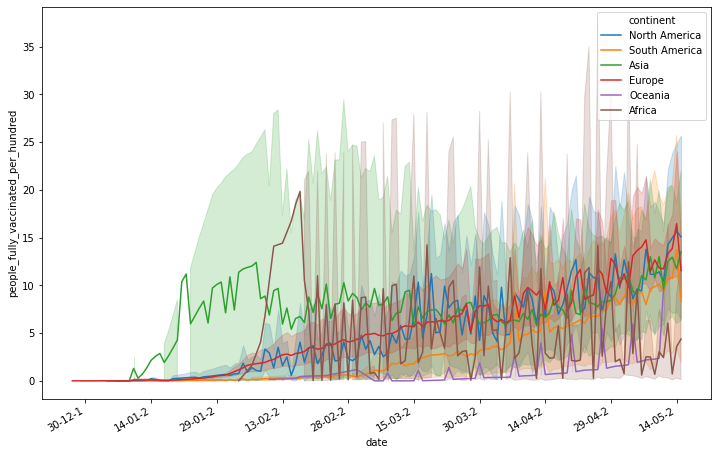

In [ ]:
#use lineplot to plot data 

graph = sns.lineplot(data= covid_data.sort_values(by='date'), x='date', y='people_fully_vaccinated_per_hundred',hue='continent' )
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
graph.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation = 90)
plt.gcf().autofmt_xdate()
plt.show()

We can see as more and more time passing by various countries are progressing on vaccinated people 


1.   We see a good linear progress in North America Graph
2.   People are hardly vaccinated in Oceania 
3.   Graph for Asia, Europe and North America is more or less close to each other





##Relation-people fully vaccinated per hundred vs life_expectancy

Plot a graph to show the relation between people fully vaccinated per hundred vs life_expectancy

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


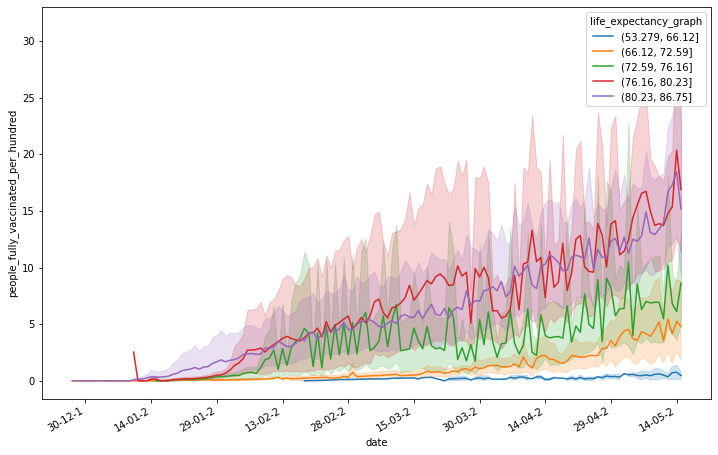

In [ ]:
#Plot a graph to show the relation between people fully vaccinated per hundred vs life_expectancy
covid_data['life_expectancy_graph'] = pd.qcut(covid_data['life_expectancy'],q=5)
graph = sns.lineplot(data=covid_data.sort_values(by='date'), x='date', y='people_fully_vaccinated_per_hundred',hue='life_expectancy_graph')
graph.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
plt.xticks(rotation = 90)
plt.gcf().autofmt_xdate()
plt.show()

* We can observe that as people are getting vaccinated life 
expectancy is also linearly increasing 
* Life expectancy is the average time a person lives 
* We can observe that in all cases are time is passing by and people started to get vaccine life expectancy is increasing 

##Relation -people fully vaccinated per hundred vs country
Plot a graph to show the relation between people fully vaccinated per hundred vs some of the main countries

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


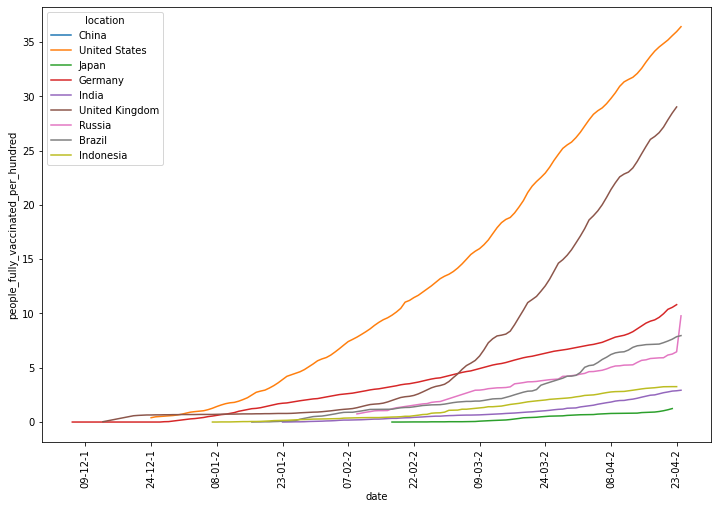

In [ ]:
graph = sns.lineplot(data=covid_data[covid_data['iso_code'].isin(['GBR','IDN','BRA','RUS','DEU','JPN','IND','USA','CHN'])]
                     .sort_values(by='date'), x='date', y='people_fully_vaccinated_per_hundred',hue='location')
graph.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
plt.xticks(rotation = 90)
plt.show()

Randomly decided on 8 countries and checked the vaccination rate
* For United States the vaccination per hundred is getting increased day by day as we think of the vacinations are going good and there was gradual increase in the vaccination rate
* We can correctly see that Japan started the vaccination around mind February
* We can obsereve that Germany started it's vaccination last year and is following the same average speed hence that graph is linear for Germany



##Overall plot for people_fully_vaccinated_per_hundred 

overall plot for people_fully_vaccinated_per_hundred 

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


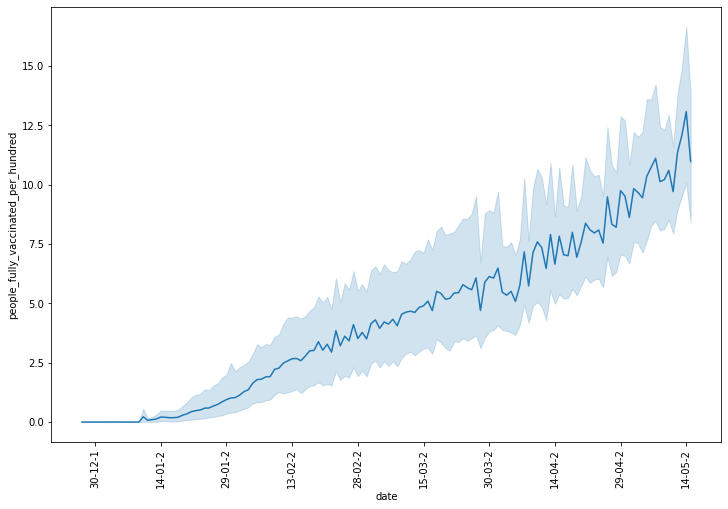

In [ ]:
#overall plot for people_fully_vaccinated_per_hundred 
graph = sns.lineplot(data=covid_data.sort_values(by="date"), x="date",
                     y="people_fully_vaccinated_per_hundred")
graph.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
plt.xticks(rotation = 90)
plt.show()

We have plotted the overall plot here:
* Overall the number of vaccinated people in the world is increasing day by day and we have a linear increase in graph 
*  Various countries have started rolling our vaccination and gradually increasing there vaccination rate per day



## Map plot based on country map

In [ ]:
#we will read in data for plotting map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [ ]:
#as we already have continent in our data we will drop that column
del covid_data['continent']
#We will join both the data for covid and world map and join it on iso_code
mapped = world.set_index('iso_a3').join(covid_data.set_index('iso_code')).reset_index()

In [ ]:
#function to create map graph
def graph_world(feature):
    #whichever data we wish to map we will send in feature
    to_be_mapped = feature
    vmin, vmax = 0,100
    fig, ax = plt.subplots(1, figsize=(25,25))

    mapped.plot(column=to_be_mapped, cmap='inferno', linewidth=0.8, ax=ax, edgecolors='0.8' , legend=True,
                legend_kwds={'label': "People Fully Vaccinated Per Hundred", 'orientation': "horizontal"})
    ax.set_title('People Fully Vaccinated In the World', fontdict={'fontsize':30})
    ax.set_axis_off()

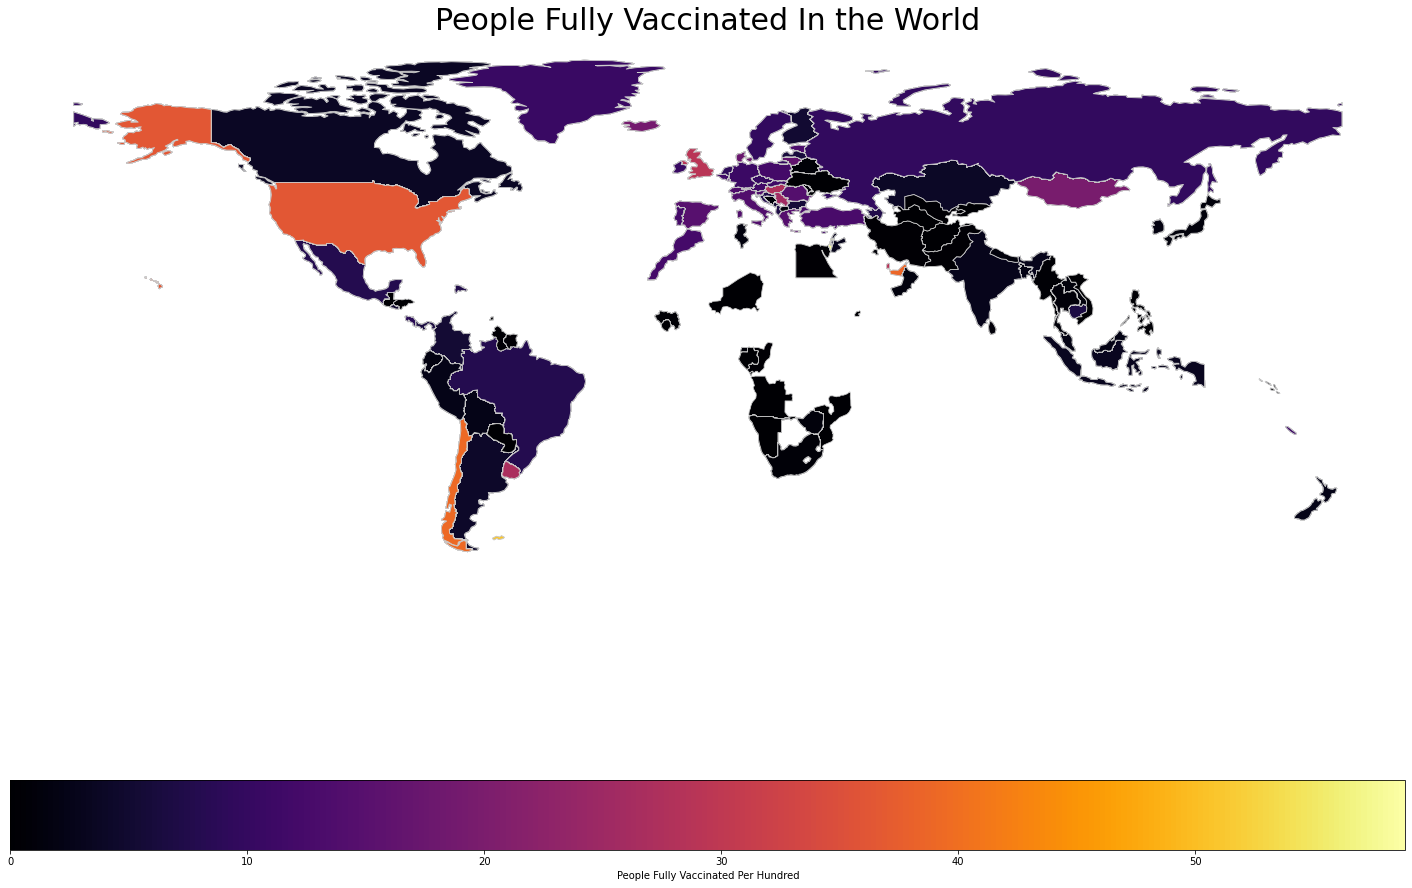

In [ ]:
#we will send data for full vaccinated people per hundred
graph_world('people_fully_vaccinated_per_hundred')

Here we have plotted people full vaccinated in the world graph on a World Map
1. Countries like USA, Chile, Alaska have vaccinated majority of there population. 
2. Countries like Russia, Brazil have reached on a little bit higher side hence they are in the Dark Purple.
3. Countires like Canada, India still have less vaccinated people as per population and hence they are in the Dark Black side.

#Prediction of vactionation rate

Find the top five country which are having the maximum vaccination in the world

In [ ]:
top_5_vacc = list(covid_data[(~covid_data['people_fully_vaccinated_per_hundred'].isna())&
                            (covid_data['date']=='2021-04-28')].sort_values
                            (by='people_fully_vaccinated_per_hundred',ascending=False)
                            .head(5)['iso_code'])
print("Top 5 vaccinated countries :\n",top_5_vacc)

Top 5 vaccinated countries :
 ['SYC', 'ISR', 'CHL', 'BHR', 'USA']


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


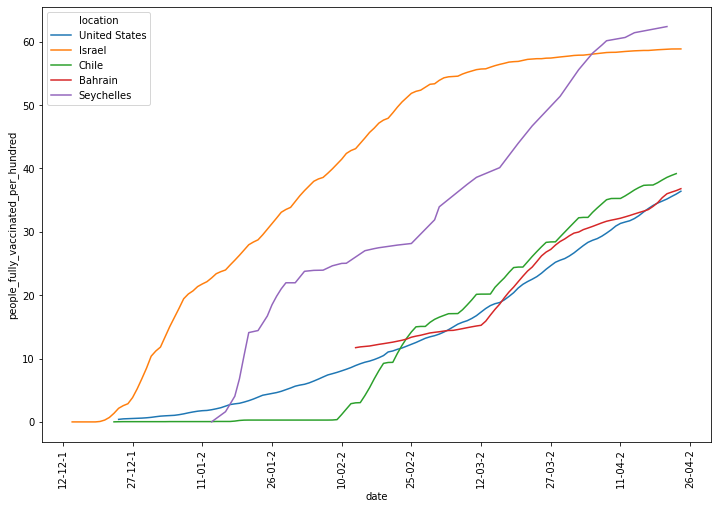

In [ ]:
#Top five countries in the world with highest vaccination rates
graph = sns.lineplot(data=covid_data[covid_data['iso_code'].isin(top_5_vacc)]
                     .sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='location')
graph.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
plt.xticks(rotation = 90)

plt.show()

 This graph shows the top five countries with highest vaccination rate
 1. Seychelles have been termed as the most vaccinated nation on Earth by WHO and we can see the vaccination per hundred is more there
 2. Israel is at the second position with a population of over 90 lakhs which is much more than Seychelles, there was rapid vaccination here and they are covid free
 3. Chile vaccination rollout is one of the best in world and we can see a rapid increase in the vaccination rate unlike USA which is linear




##Predict vaccination Rate for Top five countries

###Function to forecast vaccination and infection rate 

1. Define Prophet Model
2. Fit the model
3. Define the period for which we want a prediction
4. Use the model to make a forecast
5. Summarize the forecast
6. Plot the forecast

In [ ]:
def fcast(cntry, isVaccRate):
    if isVaccRate == "true":
      predict_data = covid_data[covid_data['iso_code'].isin([cntry])].sort_values(by="date")[['date',"people_fully_vaccinated_per_hundred"]]
    else :
      predict_data = covid_data[covid_data['iso_code'].isin([cntry])].sort_values(by="date")[['date',"new_cases_per_million"]]
   
    #ds-datestamp y-measure we wish to predict
    predict_data.columns = ['ds', 'y']
    # define the model
    model = Prophet()
    # # fit the model
    model.fit(predict_data)
    # define the period for which we want a prediction
    future = list()
    for i in range(1, 13):
        date = '2021-%01d' % i
        future.append([date])
    for i in range(1, 13):
        date = '2021-%12d' % i
        future.append([date])    
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['ds']= pd.to_datetime(future['ds'])
    
    # use the model to make a forecast
    forecast = model.predict(future)
    # summarize the forecast
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(5))
    # plot forecast
    
    model.plot(forecast)
    if isVaccRate == "true":
      plt.ylim(0, 100)
      n_lower=forecast['yhat_lower'].sub(100).abs().idxmin()
      n_upper=forecast['yhat_upper'].sub(100).abs().idxmin()
    else:
      plt.ylim(0, 2000)
      n_lower=forecast['yhat_lower'].sub(2000).abs().idxmin()
      n_upper=forecast['yhat_upper'].sub(2000).abs().idxmin()

    if isVaccRate == "true":
      plt.title(cntry 
                + ' forecast of people_fully_vaccinated_per_hundred: 100% expected between ' 
                + forecast[n_lower:n_lower+1]['ds'].iloc[0].strftime('%Y-%m-%d') 
                + ' and ' 
                + forecast[n_upper:n_upper+1]['ds'].iloc[0].strftime('%Y-%m-%d'))
    else:
      plt.title(cntry 
                + ' forecast of new_cases_smoothed_per_million'
                + forecast[n_lower:n_lower+1]['ds'].iloc[0].strftime('%Y-%m-%d') 
                + ' and ' 
                + forecast[n_upper:n_upper+1]['ds'].iloc[0].strftime('%Y-%m-%d'))
    plt.show()

#Forecast for vaccination and infection rate for top 5 countries

##Forecast for Seychelles

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01  -8.720527  -12.743148   -4.832563
1 2021-01-01  -8.720527  -12.865196   -4.773682
2 2021-02-01   5.952464    1.745344    9.965350
3 2021-02-01   5.952464    1.903306    9.990008
4 2021-03-01  22.473295   18.629599   26.364469


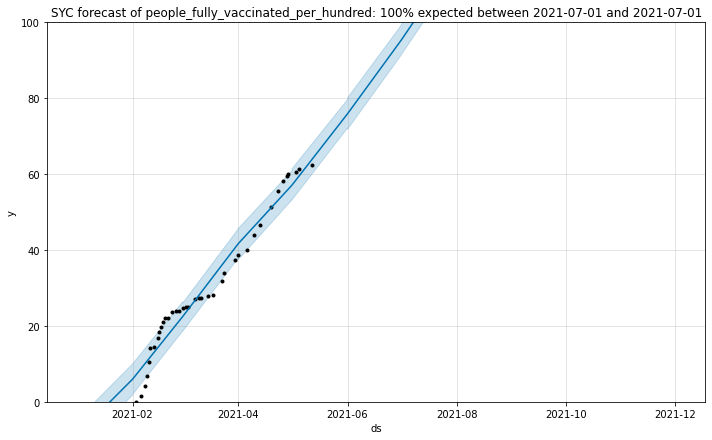

In [ ]:
#Forecast for Seychelles for vaccination rate
fcast('SYC', "true")

Prediction for Seychelles
1. Seychelles will be fully vaccinated by July 2021, here not everyone is vaccinated but almost 70% of population is already vaccinated
2. We could see a rapid increase in vaccination in this country, they started around end of 2020



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat   yhat_lower   yhat_upper
0 2021-01-01  159.435347 -1195.281239  1422.357405
1 2021-01-01  159.435347 -1169.651852  1462.109267
2 2021-02-01  653.946342  -613.514246  1916.441645
3 2021-02-01  653.946342  -672.181286  1867.485711
4 2021-03-01  872.988951  -486.853622  2123.334064


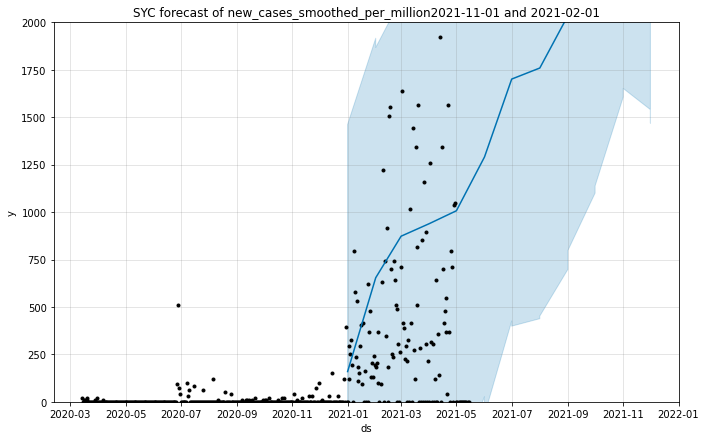

In [ ]:
#Forecast for Seychelles for infection rate
fcast('SYC', "false")

1. The infection has again increased in this country hence we can see a increase in infection between March and May
2. We can correctly obsereve that infection is going up as there have been a increase in number of cases here

##Forecast For ISRAEL

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01  -0.227842   -0.384232   -0.061042
1 2021-01-01  -0.227842   -0.378808   -0.049697
2 2021-02-01  21.744595   21.576670   21.918187
3 2021-02-01  21.744595   21.576321   21.915718
4 2021-03-01  40.089714   39.931568   40.256843


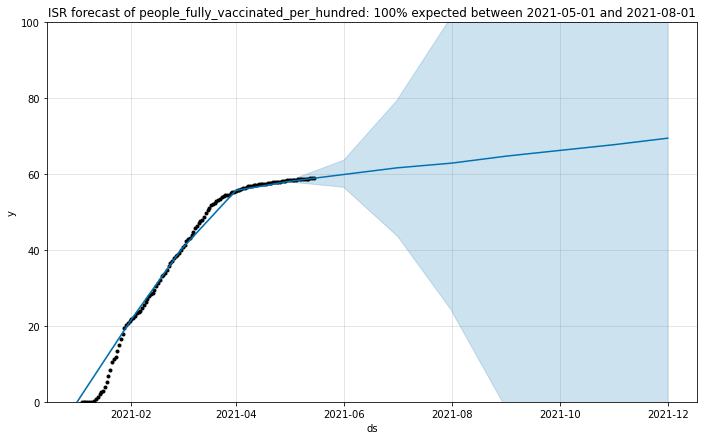

In [ ]:
#Forecast for Israel for vaccination rate
fcast('ISR', "true")

1. Prediction for when Israel will get fully vaccinated depending on the current rate Israel will be vaccinated around starting of 2021
2. Israel declared itself fully vaccinated around End of April and we can correctly predict it 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01  448.139703  204.827523  696.032793
1 2021-01-01  448.139703  201.636470  697.639001
2 2021-02-01  459.188189  207.960993  711.446251
3 2021-02-01  459.188189  213.537747  691.731134
4 2021-03-01  344.243667   75.775568  588.233437


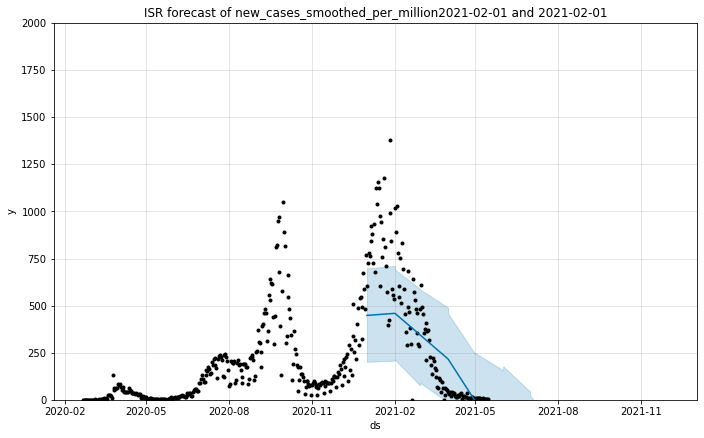

In [ ]:
#Forecast for Israel for infection rate
fcast('ISR', "false")

1. Depending on the current data we can observe that the prediction is that around May 2021 there will be zero cases in Israel
2. After being fully vaccinated predicted around end of April the cases will go down to zero as we can see in the graph above it went down to zero around May 2021 right after Israel declared itself covid free. 

##Forecast For CHL

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper
0 2021-01-01  0.121741   -0.313986    0.563009
1 2021-01-01  0.121741   -0.279989    0.552757
2 2021-02-01 -0.087331   -0.528510    0.338046
3 2021-02-01 -0.087331   -0.520532    0.347652
4 2021-03-01  0.454930    0.021047    0.847811


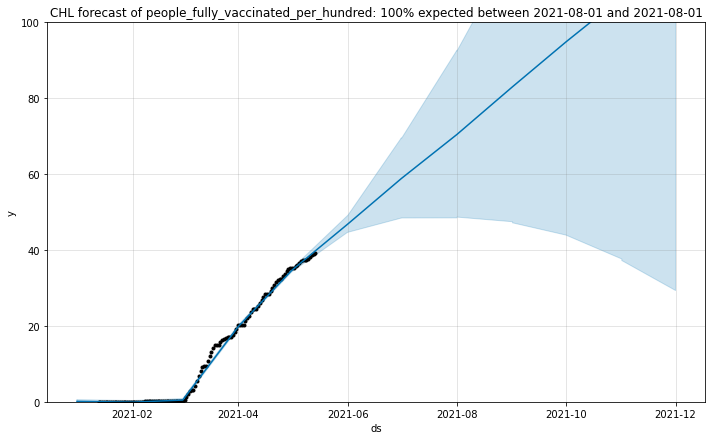

In [ ]:
fcast('CHL', "true")

1. Arrounding to prediction Chile will get fully vaccinated around August of 2021 depending on the current vaccination rate Chile is rapidly getting vaccinated 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01  160.369825   77.482514  237.164004
1 2021-01-01  160.369825   84.504346  237.780622
2 2021-02-01  188.535767  112.676796  265.121565
3 2021-02-01  188.535767  115.582072  271.573661
4 2021-03-01  234.386504  160.518901  308.945858


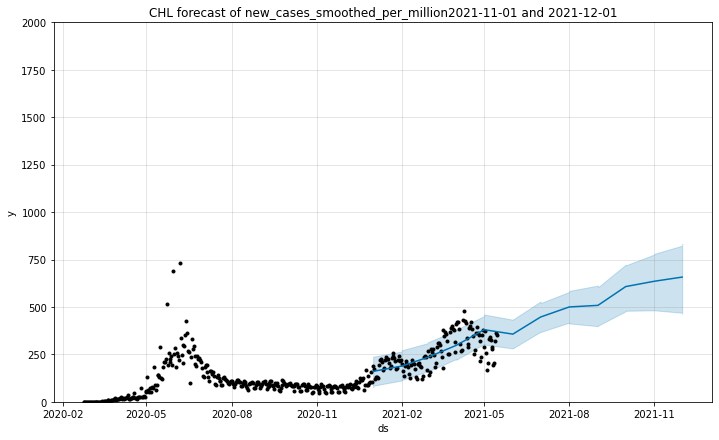

In [ ]:
fcast('CHL', "false")


1. Even though the vaccination will happen till October the infection rate have gone down in Chile as most of the population have aready received vaccination 
2. The infections will go down in Noverber according to the dates right after Chile will be fully vaccinated

##Forecast For USA

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper
0 2021-01-01 -0.094267   -0.172402   -0.014494
1 2021-01-01 -0.094267   -0.174111   -0.018212
2 2021-02-01  1.784199    1.710515    1.863266
3 2021-02-01  1.784199    1.710270    1.860610
4 2021-03-01  7.616234    7.541238    7.696103


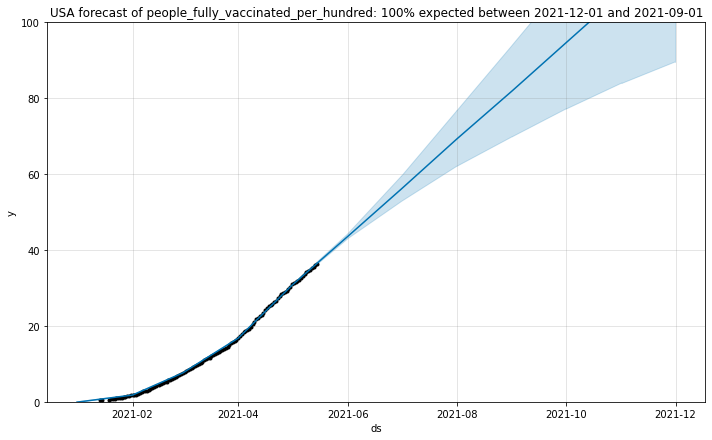

In [ ]:
fcast('USA','true')

1. Prediction for when USA will get fully vaccinated depending on the current rate
2. USA will be 100% vaccinated around end of 2021



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01  557.144568  453.328637  664.006955
1 2021-01-01  557.144568  445.000344  659.209471
2 2021-02-01  412.840059  311.515456  517.803793
3 2021-02-01  412.840059  309.248359  520.507641
4 2021-03-01  304.454251  201.838959  410.646422


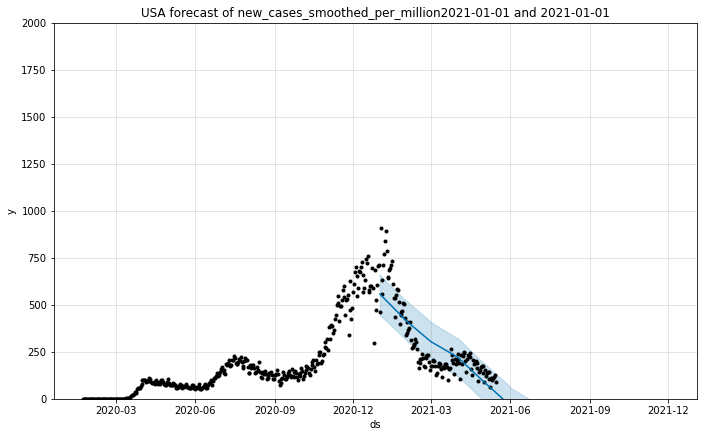

In [ ]:
fcast("USA","false")


##Forecast for Japan

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01 -32.954414  -35.356225  -30.642498
1 2021-01-01 -32.954414  -35.391396  -30.458047
2 2021-02-01 -15.656471  -18.215677  -13.239463
3 2021-02-01 -15.656471  -18.195474  -13.207982
4 2021-03-01  -0.032523   -2.569071    2.525142


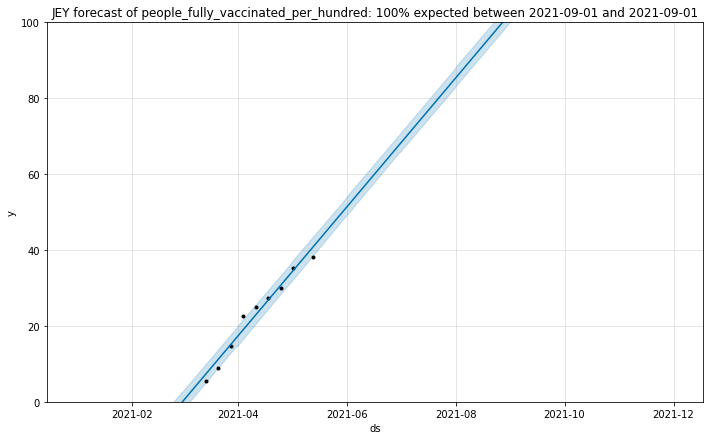

In [ ]:
fcast('JEY', "true")

#Prediction to calculate the number of weeks to acheive 70% of vaccination

## Preprocess raw data

1. convert the "Date" column into DATETIME data type
2. Remove small location where population is less than 1000000
3. Set 'location' column as row index
4. Re-scale 'total_vaccinations_per_hundred' and 'people_fully_vaccinated_per_hundred' to per million

In [ ]:
#set a minumum value for population
min_population = 1000000

#have a copy of covid data
preProcessed_covid_df = covid_data.copy()
# convert the "Date" column into DATETIME data type
preProcessed_covid_df['date'] = pd.to_datetime(preProcessed_covid_df['date'])

# Remove small location where population is less than 1000000
preProcessed_covid_df = preProcessed_covid_df[preProcessed_covid_df.population >= min_population]

# Set 'location' column as row index
preProcessed_covid_df.set_index('location', inplace=True)

#Re-scale 'total_vaccinations_per_hundred' and 'people_fully_vaccinated_per_hundred' to per million
preProcessed_covid_df['total_vaccinations_per_hundred'] *= 10000
preProcessed_covid_df['people_fully_vaccinated_per_hundred'] *= 10000
preProcessed_covid_df.rename(columns = {"total_vaccinations_per_hundred":"total_vaccinations_per_million",
                 "people_fully_vaccinated_per_hundred":"people_fully_vaccinated_per_million"}, inplace=True)

##Create Dataset to be used

1. Created new columns "perCapita_daily_columns" and "perCapita_cumulative_columns" using the exising column
2. Created dataframes for "covid_perCapita_daily_df" and "covid_perCapita_cumulative_df"


In [ ]:

#Create Dataset to be used
#Created new columns "perCapita_daily_columns" and "perCapita_cumulative_columns" using the exising column
perCapita_daily_columns = ["date","new_cases_smoothed_per_million", "new_deaths_smoothed_per_million",
                           "new_vaccinations_smoothed_per_million"]
#here we will have the total columns
perCapita_cumulative_columns = ["date", "total_cases_per_million", "total_deaths_per_million",
                                "total_vaccinations_per_million", "people_fully_vaccinated_per_million"]

# Created dataframes for "covid_perCapita_daily_df" and "covid_perCapita_cumulative_df"
covid_perCapita_daily_df = preProcessed_covid_df[perCapita_daily_columns]
covid_perCapita_cumulative_df = preProcessed_covid_df[perCapita_cumulative_columns]
covid_perCapita_daily_df.isna().sum()

date                                         0
new_cases_smoothed_per_million            2274
new_deaths_smoothed_per_million           2274
new_vaccinations_smoothed_per_million    58804
dtype: int64

##Plot Cumulative daily vaccination data

1. Define death and vaccination threshold and remove the locations below daily deaths and vacconation threshold
2. Define Tempory datasets: extract current and past date rows for each location
3. Define median vaccination

## Plot graph for CUMULATIVE DAILY DATA 

In [ ]:
# CUMULATIVE DAILY DATA #
num_days_back = 7
legend_labels = []
x_vals = []
bar_width = 0.2
date_offset = 0
bar_transparency = 1
covid_dates = covid_data['date'].to_list()
current_date = covid_dates[-4+date_offset]
past_date = covid_dates[-4*(num_days_back-date_offset)]
cumulative_deaths_threshold = 100 # include locations with more than this per million
cumulative_vax_threshold = 10


# Remove locations below daily deaths and vaccinations thresholds
covid_perCapita_cumulative_filtered_df = covid_perCapita_cumulative_df.query('total_deaths_per_million > %d or total_vaccinations_per_million > %d' %
                                                                 (cumulative_deaths_threshold, cumulative_vax_threshold))
# Temp datasets: extract current and past date rows for each location
temp_current_df = covid_perCapita_cumulative_filtered_df.sort_values('date').groupby('location').apply(lambda x: x[x['date'] == current_date])
temp_past_df = covid_perCapita_cumulative_filtered_df.sort_values('date').groupby('location').apply(lambda x: x[x['date'] == past_date])

# median total vaccinations
median_total_vaxs = int(temp_current_df['total_vaccinations_per_million'].median())


##Function to plot the cumulative data vs  vacination 
#This function will input the parameter which we have to plot against vaccination and check if it is death parameter or cases parameter

Text(64.5, 1237884.9, 'Deaths data is available on this date for 129 locations with population > 1000000, and deaths > 100/mil or vaccinations > 10/mil.\n    Data source: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv\n    Median vaccinations done for these locations to date: 175150/mil')

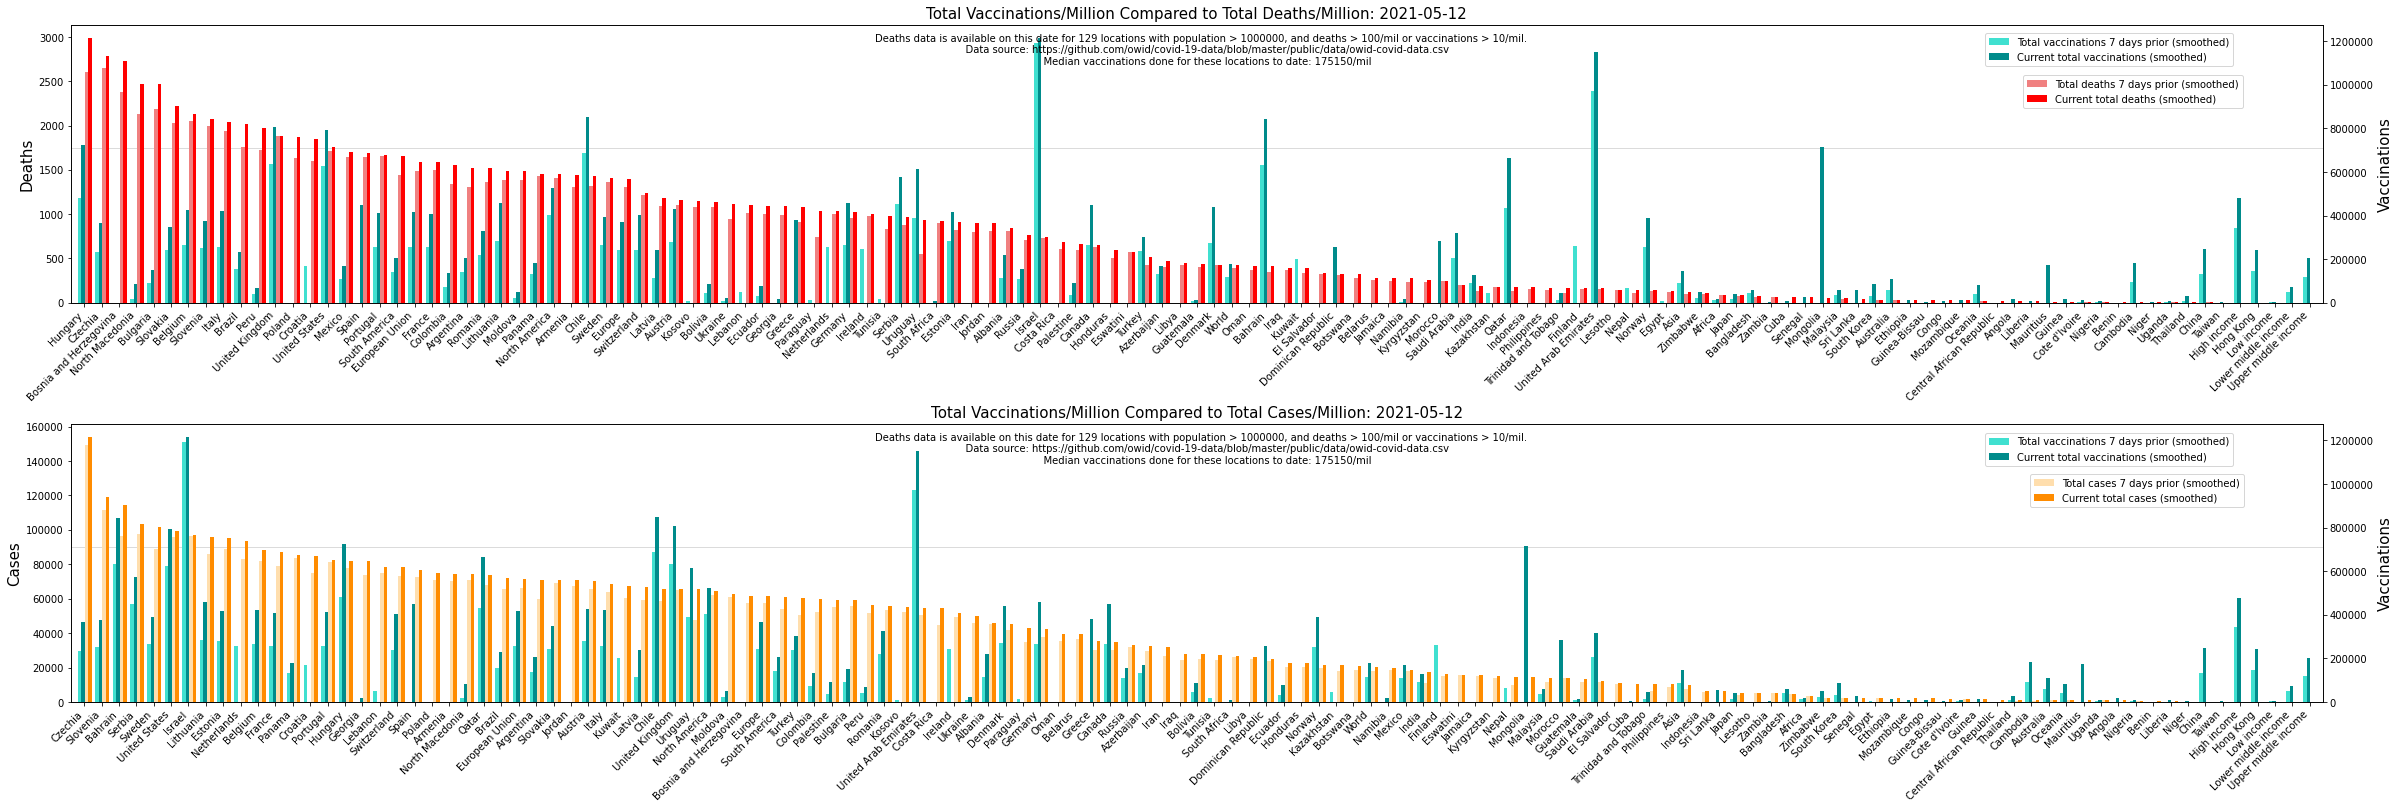

In [ ]:
# CREATE PLOTS
x_vals = np.arange(len(temp_current_df.index))
fig, axs = plt.subplots(2, 1, figsize=[int(len(x_vals)/4),10])
axs[0].ticklabel_format(scilimits=[0, 10])
axs[1].ticklabel_format(scilimits=[0, 10])
fig.tight_layout(h_pad=10)
inclusion_string = "Deaths data is available on this date for %d locations with population > %d, and deaths > %d/mil or vaccinations > %d/mil.\n\
    Data source: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv\n\
    Median vaccinations done for these locations to date: %d/mil" \
     % (len([i[0] for i in temp_current_df.index]), min_population, cumulative_deaths_threshold, cumulative_vax_threshold, median_total_vaxs)

# death/vaccinations (top)
# sort temp datasets by deaths
temp_current_df = temp_current_df.sort_values("total_deaths_per_million", ascending=False)
temp_past_df = temp_past_df.reindex(temp_current_df.index)
# plot
ax_top1 = axs[0]
ax_top2 = ax_top1.twinx()
ax_top2.ticklabel_format(scilimits=[0, 10])
ax_top2.set_ylabel('Vaccinations', fontsize=15)
ax_top1.set_ylabel('Deaths', fontsize=15)
ax_top1.set_title("Total Vaccinations/Million Compared to Total Deaths/Million: %s" % current_date, fontsize=15)
ax_top1.set_xticks(x_vals + bar_width*1.3)
ax_top1.set_xlim([-0.5,len(x_vals)])
ax_top1.set_xticklabels([i[0] for i in temp_current_df.index], rotation = 45, ha='right')
ax_top1.bar(x_vals + bar_width*2, temp_past_df["total_deaths_per_million"], alpha=bar_transparency, color='lightcoral', width=bar_width, zorder=1)
ax_top1.bar(x_vals + bar_width*3, temp_current_df["total_deaths_per_million"], alpha=bar_transparency, color='red', width=bar_width, zorder=1)
ax_top1.hlines(ax_top1.get_yticks()[-1]/2, ax_top1.get_xlim()[0], ax_top1.get_xlim()[1], color='lightgray', zorder=0, linewidth=0.8, label='_nolegend_')
ax_top2.bar(x_vals, temp_past_df["total_vaccinations_per_million"], color='turquoise', width=bar_width, zorder=1)
ax_top2.bar(x_vals + bar_width, temp_current_df["total_vaccinations_per_million"], alpha=bar_transparency, color='darkcyan', width=bar_width, zorder=1)
ax_top2.legend(['Total vaccinations %d days prior (smoothed)'%num_days_back, 'Current total vaccinations (smoothed)'], loc=[0.85,0.85])
ax_top1.legend(['Total deaths %d days prior (smoothed)'%num_days_back, 'Current total deaths (smoothed)'], loc=[0.867, 0.7])
ax_top2.text(ax_top2.get_xlim()[1]/2, ax_top2.get_ylim()[1]*0.97, inclusion_string, ha='center', va='top', fontsize=10, zorder=2)

# cases/vaccinations (bottom)
# sort temp datasets by cases
temp_current_df = temp_current_df.sort_values("total_cases_per_million", ascending=False)
temp_past_df = temp_past_df.reindex(temp_current_df.index)
#plot
ax_bottom1 = axs[1]
ax_bottom2 = ax_bottom1.twinx()
ax_bottom2.ticklabel_format(scilimits=[0, 10])
ax_bottom2.set_ylabel('Vaccinations', fontsize=15)
ax_bottom1.set_ylabel('Cases', fontsize=15)
ax_bottom1.set_title("Total Vaccinations/Million Compared to Total Cases/Million: %s" % current_date, fontsize=15)
ax_bottom1.set_xticks(x_vals + bar_width*1.3)
ax_bottom1.set_xticklabels([i[0] for i in temp_current_df.index], rotation = 45, ha='right')
ax_bottom1.set_xlim([-0.5,len(x_vals)])
ax_bottom1.bar(x_vals + bar_width*2, temp_past_df["total_cases_per_million"], alpha=bar_transparency, color='navajowhite', width=bar_width)
ax_bottom1.bar(x_vals + bar_width*3, temp_current_df["total_cases_per_million"], alpha=bar_transparency, color='darkorange', width=bar_width)
ax_bottom1.hlines(ax_bottom1.get_yticks()[-1]/2, ax_bottom1.get_xlim()[0], ax_bottom1.get_xlim()[1], color='lightgray', zorder=0, linewidth=0.8, label='_nolegend_')
ax_bottom2.bar(x_vals, temp_past_df["total_vaccinations_per_million"], color='turquoise', width=bar_width)
ax_bottom2.bar(x_vals + bar_width, temp_current_df["total_vaccinations_per_million"], alpha=bar_transparency, color='darkcyan', width=bar_width)
ax_bottom2.legend(['Total vaccinations %d days prior (smoothed)'%num_days_back, 'Current total vaccinations (smoothed)'], loc=[0.85,0.85])
ax_bottom1.legend(['Total cases %d days prior (smoothed)'%num_days_back, 'Current total cases (smoothed)'], loc=[0.87, 0.7])
ax_bottom2.text(ax_top2.get_xlim()[1]/2, ax_top2.get_ylim()[1]*0.97, inclusion_string, ha='center', va='top', fontsize=10, zorder=2)

In [ ]:

# median daily vaccinations
def plotFunction(value_plot, death):

   #sort the data for the parameter for which we are checking
  temp_current_df_sort = temp_current_df.sort_values(value_plot, ascending=False)
  temp_past_df_re = temp_past_df.reindex(temp_current_df_sort.index)

  x_vals = np.arange(len(temp_current_df.index))
  fig, axs = plt.subplots(1, 1, figsize=[int(len(x_vals)/4),10])

  # median daily vaccinations
  fig.tight_layout(h_pad=10)
  inclusion_string = "Deaths data is available on this date for %d locations with population > %d, and deaths > %d/mil or vaccinations > %d/mil.\n\
      Data source: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv\n\
      Median vaccinations done for these locations to date: %d/mil" \
      % (len([i[0] for i in temp_current_df.index]), min_population, cumulative_deaths_threshold, cumulative_vax_threshold, median_total_vaxs)


  #set two axis to plot two graphs
  ax_top1 = axs
  ax_top2 = ax_top1.twinx()
  ax_top2.ticklabel_format(scilimits=[0, 10])

  #second graph will hold vaccination data
  ax_top2.set_ylabel('Vaccinations', fontsize=15)
  
  #depending on if we need to plot againt death or cases we will set another garph
  if death == True:
    ax_top1.set_ylabel('Deaths', fontsize=15)
    ax_top1.set_title("Total Vaccinations/Million Compared to Total Deaths/Million: %s" % current_date, fontsize=15)
  else:
    ax_top1.set_ylabel('Cases', fontsize=15)
    ax_top1.set_title("Total Vaccinations/Million Compared to Total Cases/Million: %s" % current_date, fontsize=15)

  #set the colour and other parameters plot for death we use red color for cases we use darkorange
  ax_top1.set_xticks(x_vals + bar_width*1.3)
  ax_top1.set_xticklabels([i[0] for i in temp_current_df_sort.index], rotation = 45, ha='right')
  ax_top1.set_xlim([-0.5,len(x_vals)])
  
  if death == True:
    ax_top1.bar(x_vals + bar_width*2, temp_past_df_re[value_plot], alpha=bar_transparency, color='lightcoral', width=bar_width, zorder=1)
    ax_top1.bar(x_vals + bar_width*3, temp_current_df_sort[value_plot], alpha=bar_transparency, color='red', width=bar_width, zorder=1)
  else:
    ax_top1.bar(x_vals + bar_width*2, temp_past_df[value_plot], alpha=bar_transparency, color='navajowhite', width=bar_width)
    ax_top1.bar(x_vals + bar_width*3, temp_current_df[value_plot], alpha=bar_transparency, color='darkorange', width=bar_width)

  #set vaccination parameter and define a colour for plotting
  ax_top1.hlines(ax_top1.get_yticks()[-1]/2, ax_top1.get_xlim()[0], ax_top1.get_xlim()[1], color='lightgray', zorder=0, linewidth=0.8, label='_nolegend_')
  ax_top2.bar(x_vals, temp_past_df_re["total_vaccinations_per_million"], color='turquoise', width=bar_width, zorder=1)
  ax_top2.bar(x_vals + bar_width, temp_current_df_sort["total_vaccinations_per_million"], alpha=bar_transparency, color='darkcyan', width=bar_width, zorder=1)
  ax_top2.legend(['Total vaccinations %d days prior (smoothed)'%num_days_back, 'Current total vaccinations (smoothed)'], loc=[0.85,0.85])

  #set the past date for which we have plotted 
  if death == True:
    ax_top1.legend(['Total deaths %d days prior (smoothed)'%num_days_back, 'Current total deaths (smoothed)'], loc=[0.867, 0.7])
  else:
    ax_top1.legend(['Total Cases %d days prior (smoothed)'%num_days_back, 'Current total Cases (smoothed)'], loc=[0.867, 0.7])

  ax_top2.text(ax_top2.get_xlim()[1]/2, ax_top2.get_ylim()[1]*0.97, inclusion_string, ha='center', va='top', fontsize=10, zorder=2)

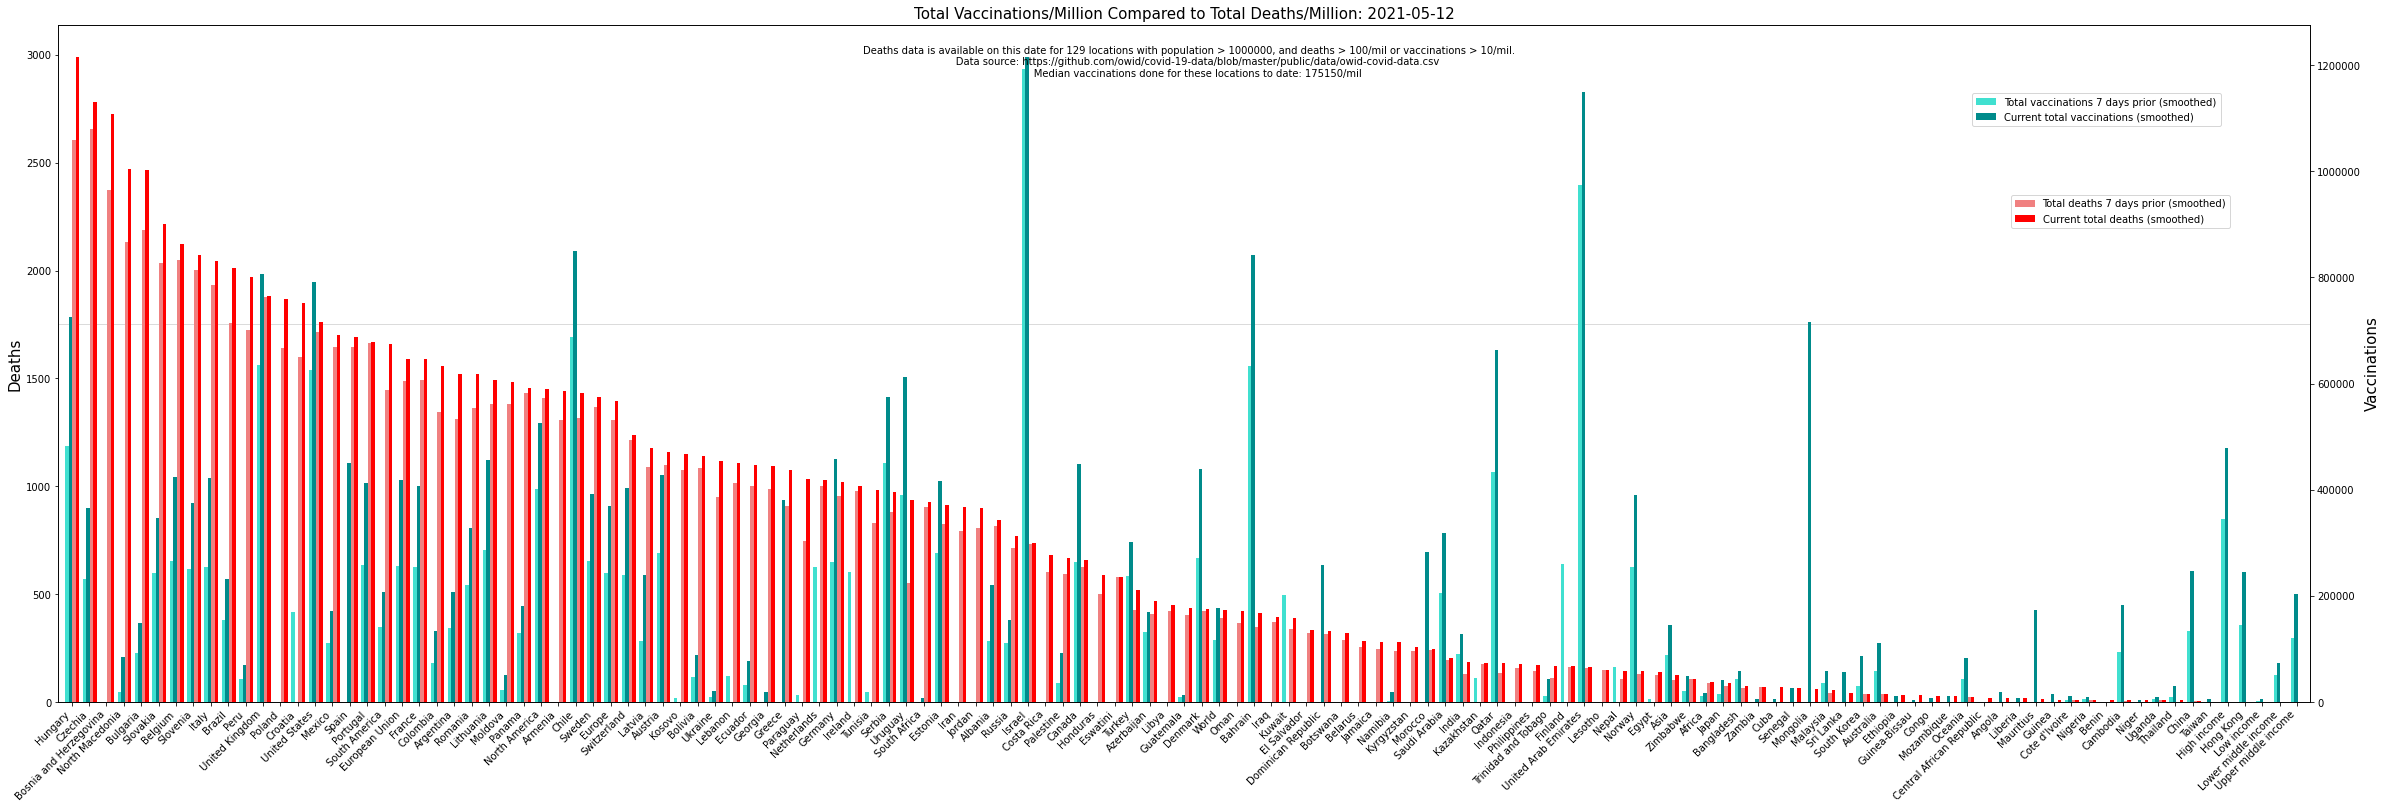

In [ ]:
plotFunction("total_deaths_per_million",True)

The cumulative data for all locations for Deaths vs Vaccination:
1. Taken the case for Chile the vaccinations rate is high than total deaths by covid also Chile comes under top vaccinated country 
2. For India were the vaccination per million is not yet that hight but still the total deaths is low because overall deaths through Covid 19 is not much in India
3. For Italy were vaccination is not much and we had cases where deaths was highest in Italy

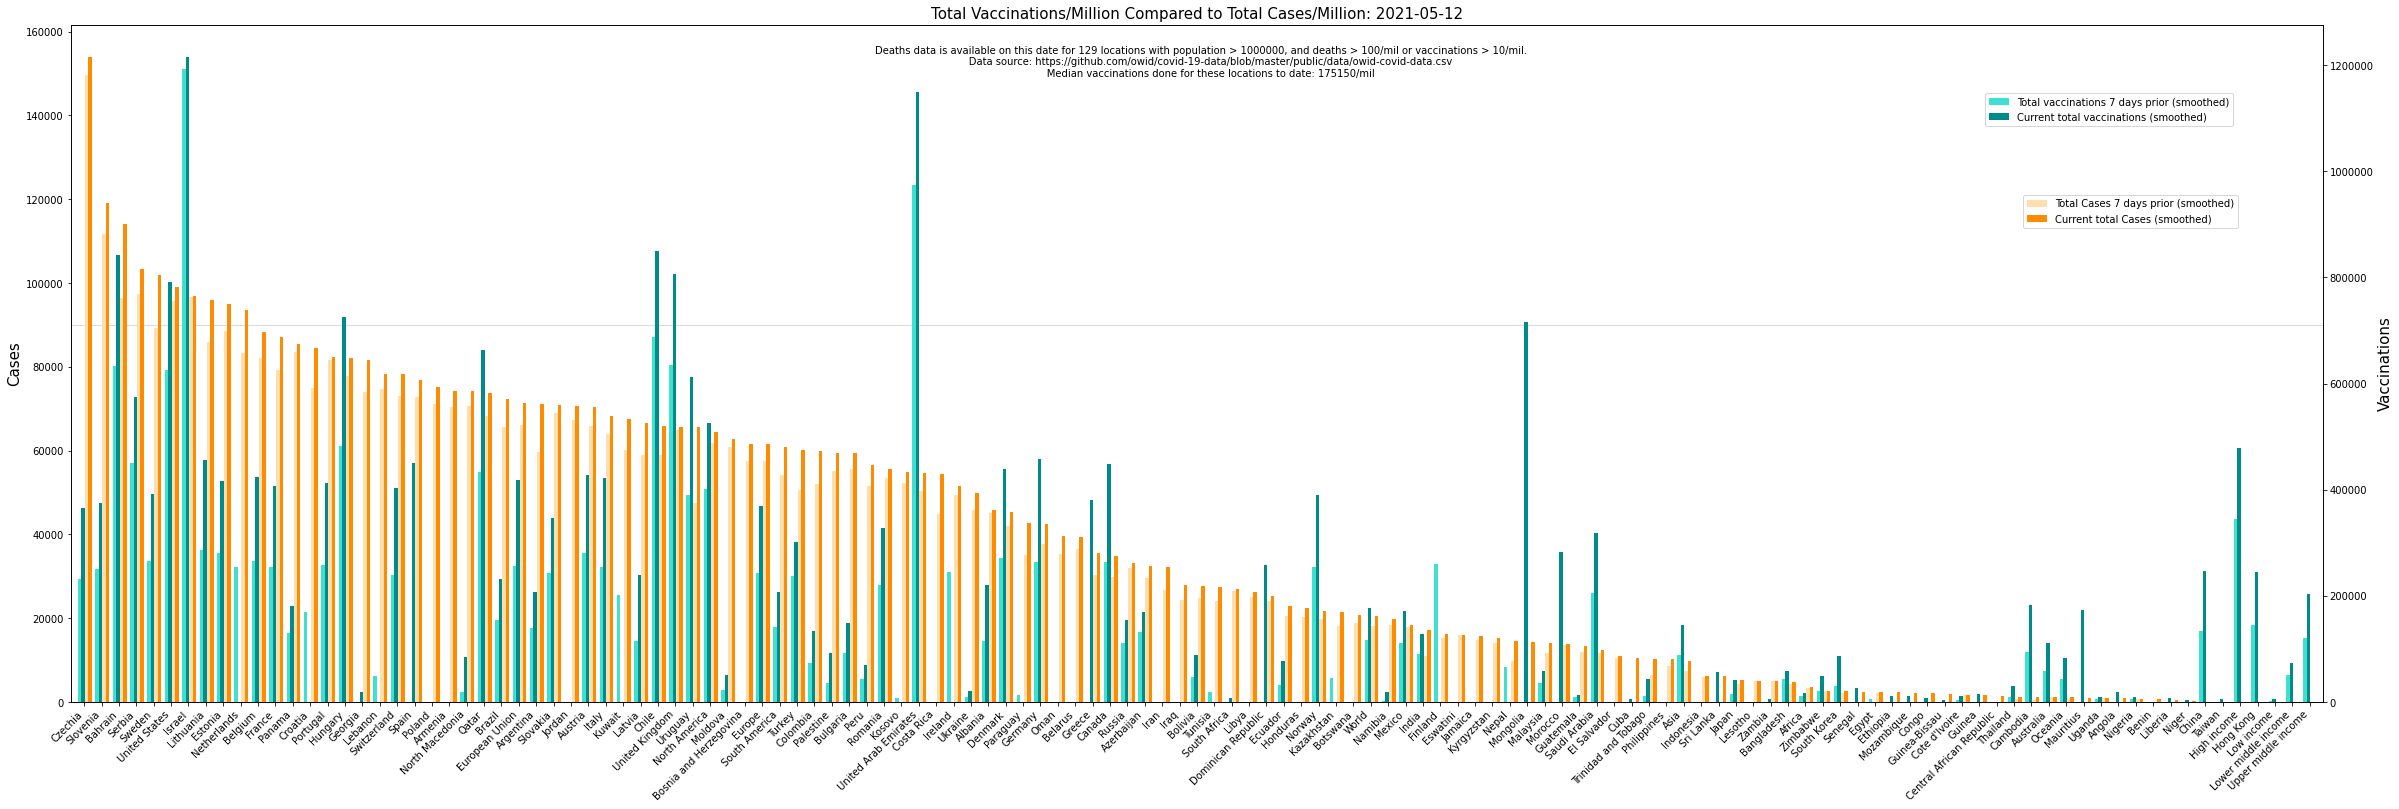

In [ ]:
plotFunction("total_cases_per_million", False)

The cumulative data for all locations for Cases vs Vaccination:
1. United Arab Emirates have a raid vaccination and the cases are also average here as correctly found from data
2. India saw a rapid increases in Covid cases and we can see that the vaccination total and cases total is almost the same


# Calculate number of weeks to full vaccination

## Preprocess raw data

1. convert the "Date" column into DATETIME data type
2. Remove small location where population is less than 1000000
3. Set 'location' column as row index
4. Re-scale 'total_vaccinations_per_hundred' and 'people_fully_vaccinated_per_hundred' to per million

#Function for Calculation of 70% vaccination prediction

In [ ]:
#Calculate number of weeks to full vaccination
def weeksToVaccination(location):
    #define few variables 
    #will hold the past dates for which it will check
    last_n_days = 41
    #vaccine threshold i.e.70%
    vaccin_threshold = 0.7
    times_to_vaccin = []
    lowerInterval_vaccin_times = []
    upperInterval_vaccin_times = []
    daily_vaxs = []
    dates = []


    # select relevant vaccination columns for selected location
    location_daily_vaccine_per_mill = preProcessed_covid_df.loc[location, ['new_vaccinations_smoothed_per_million', 'date', 'total_vaccinations_per_million', 
                                                                          'people_fully_vaccinated_per_million']]
    # get date of first daily vaccination value
    first_vax_date = location_daily_vaccine_per_mill.set_index('date').notna().idxmax()
    #only select the data from where the vaccination started
    location_daily_vaccine_per_mill = location_daily_vaccine_per_mill[location_daily_vaccine_per_mill['date'] >= first_vax_date[0]]

    # get times_to_vaccin figures
    for i in range(last_n_days):
    # for last 21 days check if new_vaccinations_smoothed_per_million is more than 0
      if location_daily_vaccine_per_mill.iloc[-1*last_n_days+i]['new_vaccinations_smoothed_per_million'] > 0:
        #take new vaccination in daily figure
        daily_fig = location_daily_vaccine_per_mill.iloc[-1*last_n_days+i]['new_vaccinations_smoothed_per_million']
        #take total vaccination in total fig
        total_fig = location_daily_vaccine_per_mill.iloc[-1*last_n_days+i]['total_vaccinations_per_million']
        #take people fully vaccinated in fully vaccinated fig
        fully_vaxxed_fig = location_daily_vaccine_per_mill.iloc[-1*last_n_days+i]['people_fully_vaccinated_per_million']
        #check if people full vaccinated in null and set to zero
        if math.isnan(fully_vaxxed_fig):
          fully_vaxxed_fig = 0
        #append daily figure value to daily vaccination
        daily_vaxs.append(daily_fig)
        #append the dates 
        dates.append(location_daily_vaccine_per_mill.iloc[-1*last_n_days+i]['date'])
        # append lists for plotting of all this three figure there will be three division here
        times_to_vaccin.append(((vaccin_threshold*1000000 - fully_vaxxed_fig)*2 - (total_fig-2*fully_vaxxed_fig))/(daily_fig*7))
        lowerInterval_vaccin_times.append((((vaccin_threshold-0.2)*1000000 - fully_vaxxed_fig)*2 - (total_fig-2*fully_vaxxed_fig))/(daily_fig*7)) 
        upperInterval_vaccin_times.append((((vaccin_threshold+0.2)*1000000 - fully_vaxxed_fig)*2 - (total_fig-2*fully_vaxxed_fig))/(daily_fig*7))

    # Vaccination breakdowns find the daily dose and people reeciving second dose
    percent_single_dose = (location_daily_vaccine_per_mill['total_vaccinations_per_million'].tail(1) - location_daily_vaccine_per_mill['people_fully_vaccinated_per_million'].tail(1)*2)/10000
    percent_double_dose = location_daily_vaccine_per_mill['people_fully_vaccinated_per_million'].tail(1)/10000

    # plot the findings
    #create a subplot and set valid title
    fig, ax1 = plt.subplots(figsize=(15,10))
    ax1.set_title('%s: Daily vaccinations/million and their times to significant population vaccination\nif they were sustained' % location, fontsize=17, pad=20)
    ax2 = ax1.twinx()
    #ax1 will hold the daily vaccine count 
    # ax1: daily vaxs
    ax1.set_ylabel("Daily\nvaccinations\nper\nmillion", fontsize=15,rotation='horizontal', ha='right', va='center')
    #fill in the color
    ax1.fill_between(dates, daily_vaxs, color='limegreen', alpha=0.5, zorder=-1)
    #set axis limits
    ax1.set_ylim([0, max(daily_vaxs)*1.3])
    ax1.set_xlim([dates[0], dates[-1]])
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 45) 
    ax1.plot(dates,daily_vaxs, color='limegreen',zorder=1)
    ax1.legend(['daily vaccinations per million (smoothed)'], loc='lower left', fontsize=11)
    #ax2 will hold the weeks to be 70% vaccinated
    # ax2: weeks to vaccin
    ax2.plot(dates, times_to_vaccin, color='red', linewidth=4)
    ax2.set_ylim([0, max([x for x in times_to_vaccin if np.isnan(x) == False])*1.1])
    #we plot the upper and lower vaccine time
    ax2.plot(dates, lowerInterval_vaccin_times, color='grey', linewidth=2, linestyle='--')
    ax2.plot(dates, upperInterval_vaccin_times, color='black', linewidth=2, linestyle='--')
    ax2.set_ylabel("Weeks until\n%d%% fully\nvaccinated\n(2 doses)" % int(100*vaccin_threshold), fontsize=15, rotation='horizontal', ha='left', va='center')
    ax2.legend(['weeks to %d%% fully vaccinated if daily number is sustained.' % int(vaccin_threshold*100), 'weeks to %d%% and %d%% vaccinated.' % (int((vaccin_threshold-0.2)*100+1), int((vaccin_threshold+0.2)*100+1))],
              fontsize=11, loc='lower right')
    if not math.isnan(percent_double_dose): 
      ax2.text(dates[int(len(dates)/2)], ax2.get_ylim()[1]*0.97, 'To date: %0.1f%% of population given two doses +\n%0.1f%% given one dose' % (percent_double_dose, percent_single_dose),
            ha='center', va='top', fontsize=14)


**Now lets plot graph for United States**

In [ ]:
weeksToVaccination('United States')

We have plotted a Graph for United States we can observe that:
1. The percentage of population who have received full dose and percentage of population who received one dose only
2. It will take 15 weeks for 70% of population to get fully vaccinated according to the current vaccination rate
3. We can also observe the vaccination per day have decreased as we have reached the month of May
2. Almost 50% population has already been vaccinated and or received one dose by 5th. week 